# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 17 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = int(1e4)
theta = 1
sample = sps.uniform.rvs(size=N, scale=float(theta))

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

$$A = 2\overline{X}$$
$$B = \overline{X} + X_{(n)}/2$$
$$C = (n+1)X_{(1)}$$
$$D = X_{(1)}+X_{(n)}$$
$$E = \frac{n+1}{n} X_{(n)}$$

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

In [4]:
x = np.linspace(1, N, N)
consecutive_numbers = np.array(range(1, N + 1, 1))
# cчитаем оценки
A = 2 * sample.cumsum() / consecutive_numbers
B = 0.5 * (A + np.maximum.accumulate(sample))
C = (consecutive_numbers + 1) * np.minimum.accumulate(sample)
D = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
E = np.maximum.accumulate(sample) * (1 + consecutive_numbers) / consecutive_numbers
# считаем значения отклонений
deltaA = abs(A - theta)
deltaB = abs(B - theta)
deltaC = abs(C - theta)
deltaD = abs(D - theta)
deltaE = abs(E - theta)

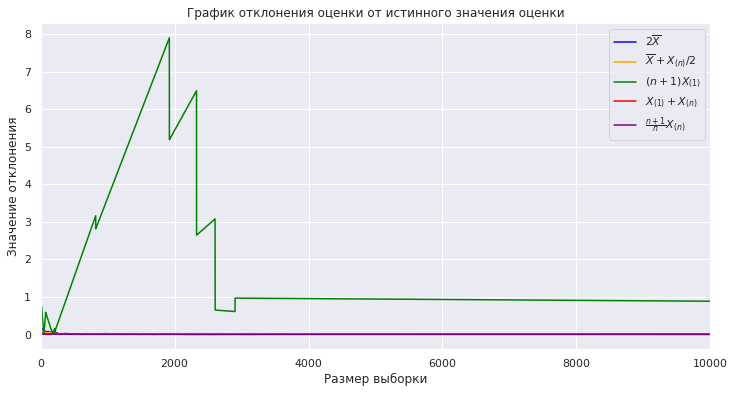

In [5]:
fig = plt.figure(figsize=(12, 6))
plt.title('График отклонения оценки от истинного значения оценки')

plt.plot(x, deltaA, color='blue', label='$2\overline{X}$')
plt.plot(x, deltaB, color='orange', label='$\overline{X} + X_{(n)}/2$')
plt.plot(x, deltaC, color='green', label='$(n+1)X_{(1)}$')
plt.plot(x, deltaD, color='red', label='$X_{(1)}+X_{(n)}$')
plt.plot(x, deltaE, color='purple', label='$\\frac{n+1}{n} X_{(n)}$')

plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Значение отклонения')
plt.xlim((0, N))
plt.show()

Заметим, что оценка $(n+1)X_{(1)}$ сильно выбивается, исключим её из дальнейшего построения и обрежем масштаб по оси $y$.

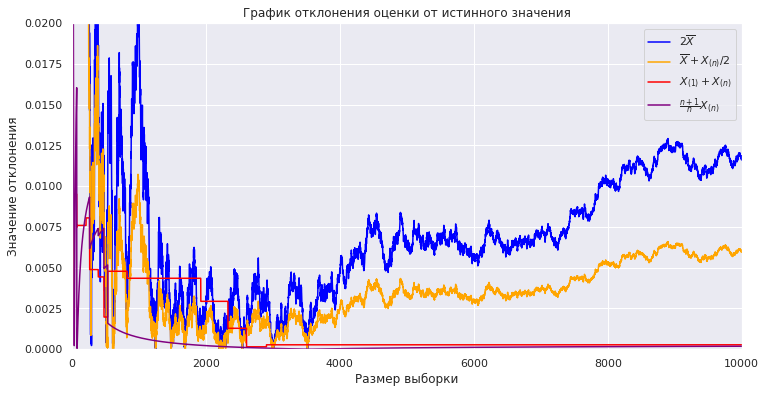

In [6]:
plt.figure(figsize=(12, 6))
plt.title('График отклонения оценки от истинного значения')

plt.plot(x, deltaA, color='blue', label='$2\overline{X}$')
plt.plot(x, deltaB, color='orange', label='$\overline{X} + X_{(n)}/2$')
plt.plot(x, deltaD, color='red', label='$X_{(1)}+X_{(n)}$')
plt.plot(x, deltaE, color='purple', label='$\\frac{n+1}{n} X_{(n)}$')

plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Значение отклонения')
plt.xlim((0, N))
plt.ylim((0, 0.02))
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__
Таким образом, оценки $X_{(1)}+X_{(n)}$ и $\frac{n+1}{n} X_{(n)}$ оказались наилучшими. Отметим, что вторая оценка из перечисленных сходится несколько более плавно, чем первая.

Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

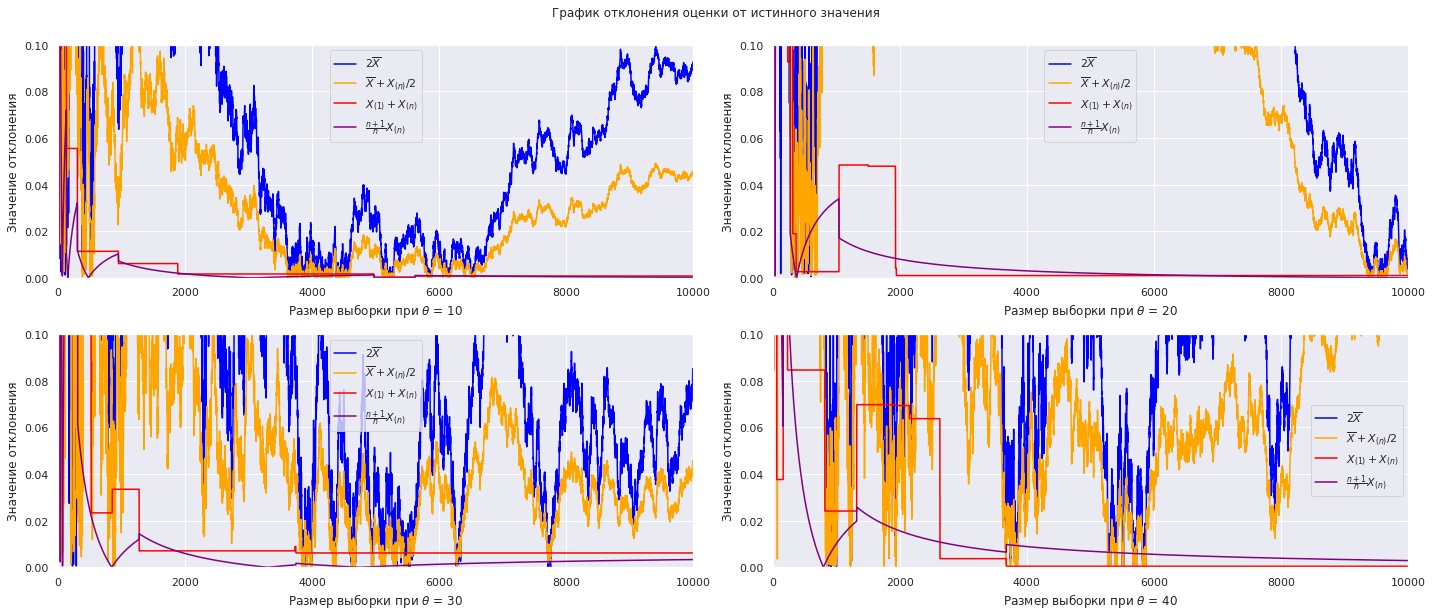

In [7]:
thetas = [10, 20, 30, 40]  # количество случайных величин
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(len(thetas)):
    # Генерация выборки
    theta = thetas[i]
    sample = sps.uniform.rvs(size=N, scale=float(thetas[i]))
    # cчитаем оценки
    A = 2 * sample.cumsum() / consecutive_numbers
    B = 0.5 * (A + np.maximum.accumulate(sample))
    D = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
    E = np.maximum.accumulate(sample) * (1 + consecutive_numbers) / consecutive_numbers
    # считаем значения отклонений
    deltaA = abs(A - theta)
    deltaB = abs(B - theta)
    deltaD = abs(D - theta)
    deltaE = abs(E - theta)
    # График
    plt.subplot(5, 2, i + 1)
    plt.plot(x, deltaA, color='blue', label='$2\overline{X}$')
    plt.plot(x, deltaB, color='orange', label='$\overline{X} + X_{(n)}/2$')
    plt.plot(x, deltaD, color='red', label='$X_{(1)}+X_{(n)}$')
    plt.plot(x, deltaE, color='purple', label='$\\frac{n+1}{n} X_{(n)}$')
    plt.xlabel('Размер выборки при $\\theta$ = {}'.format(theta))
    plt.ylabel('Значение отклонения')
    plt.xlim((0, N))
    plt.ylim((0, 0.1))
    plt.legend()

plt.suptitle('График отклонения оценки от истинного значения', y=1)
plt.tight_layout()

__Вывод:__
Отметим, что предположение, высказанное в предыдущем выводе, оказалось верным для иных рассмотренных значений $\theta$, что подтверждает гипотезу. Наилучшей является оценка $\frac{n+1}{n} X_{(n)}$. Оценка $(n+1)X_{(1)}$ оказалась наихудшей и была исключена из экспериментов.

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$.

In [8]:
theta = float(1)
sample = sps.expon(0, theta).rvs(size=N)

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

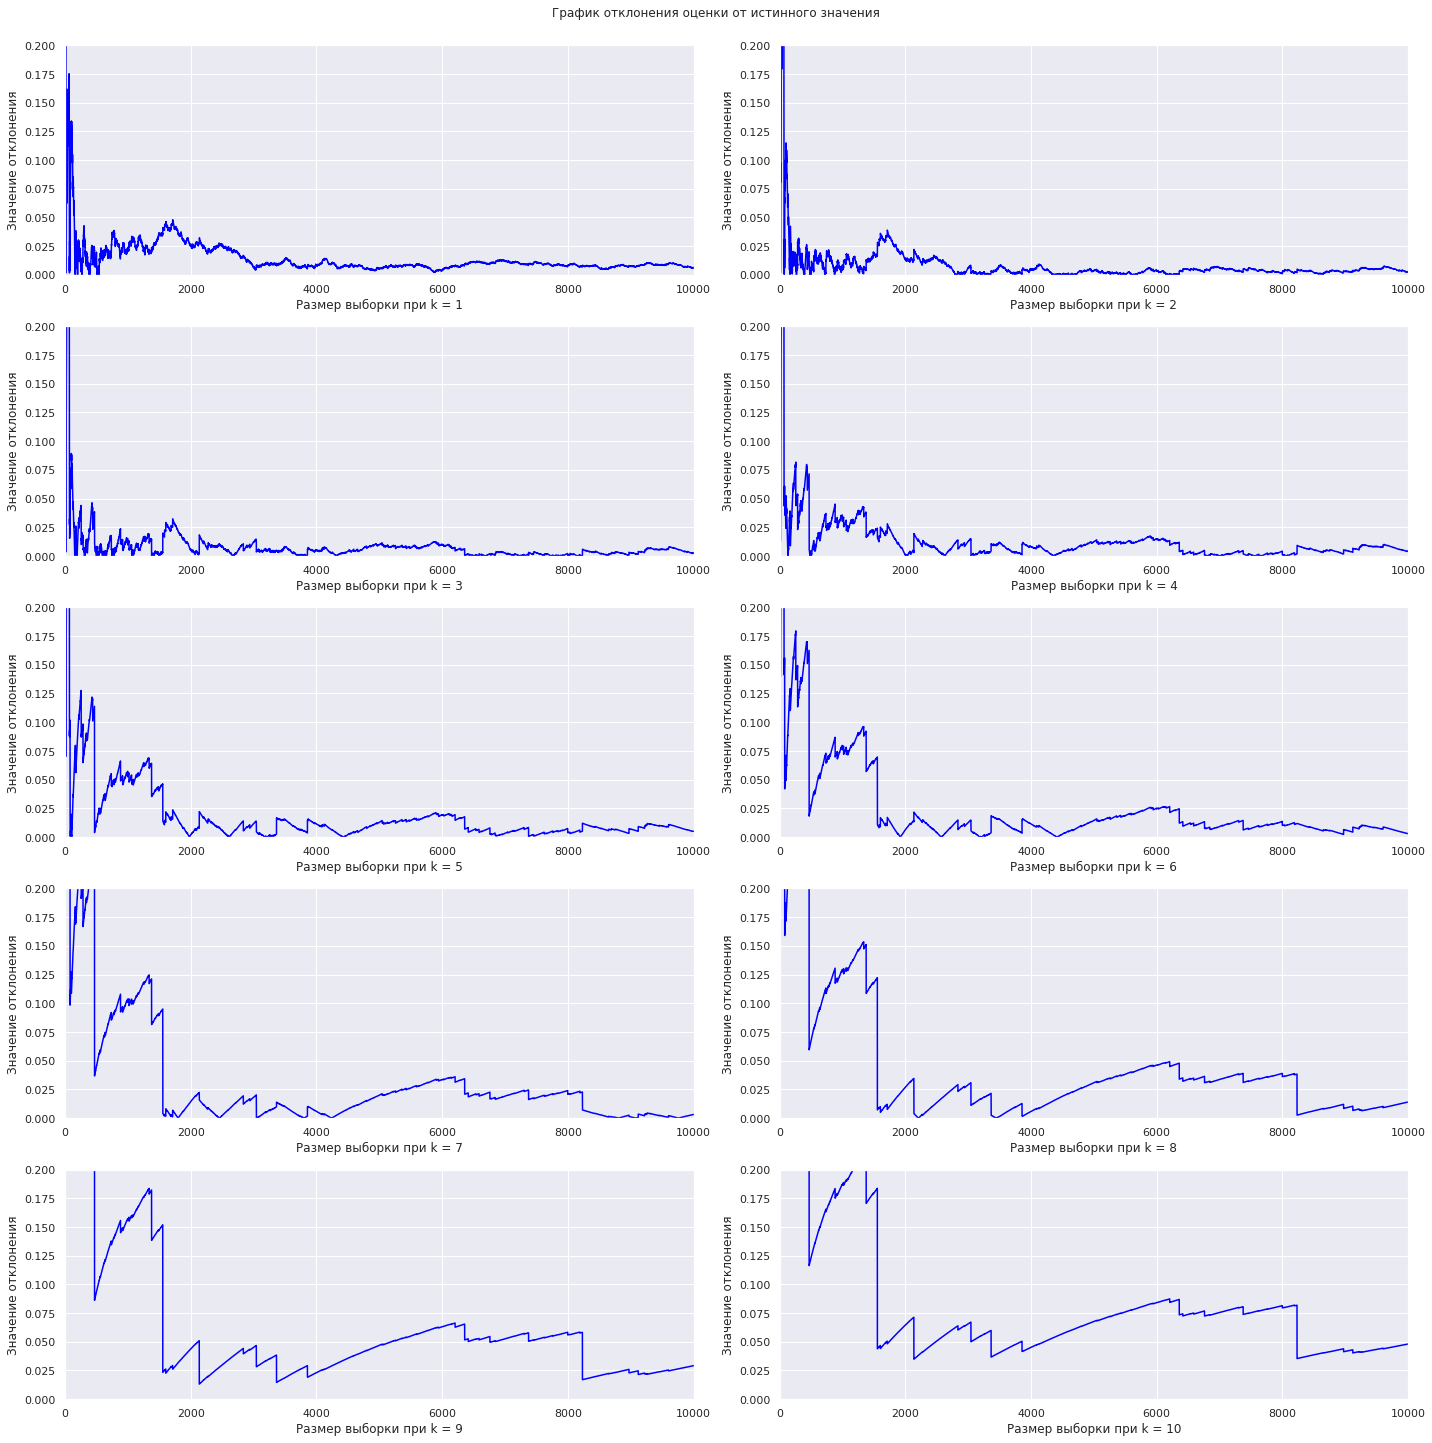

In [9]:
plt.figure(figsize=(20, 20))

for k in range(1, 11, 1):
    plt.subplot(5, 2, k)
    A = (np.math.factorial(k) / ((sample ** k).cumsum() / consecutive_numbers)) ** (1 / k)
    plt.plot(x, abs(A - theta), color='blue', label='$2\overline{X}$')
    plt.xlabel('Размер выборки при k = {}'.format(k))
    plt.ylabel('Значение отклонения')
    plt.xlim((0, N))
    plt.ylim((0, 0.2))

plt.suptitle('График отклонения оценки от истинного значения', y=1)
plt.tight_layout()

__Вывод:__
Заметим, что с увеличением $k$ отклонение от истинного значения становится хуже и хуже. Таким образом, рассматриваемая оценка наилучшим образом применима при небольших $k$.

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$.

Расмотрим классический пример с семинара: распределение Парето $f_{\gamma}(x) = \gamma x^{-1-\gamma} I(x \ge 1)$ с параметром $\gamma = 5$.

In [10]:
gamma = 5
sample = sps.pareto.rvs(gamma, size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

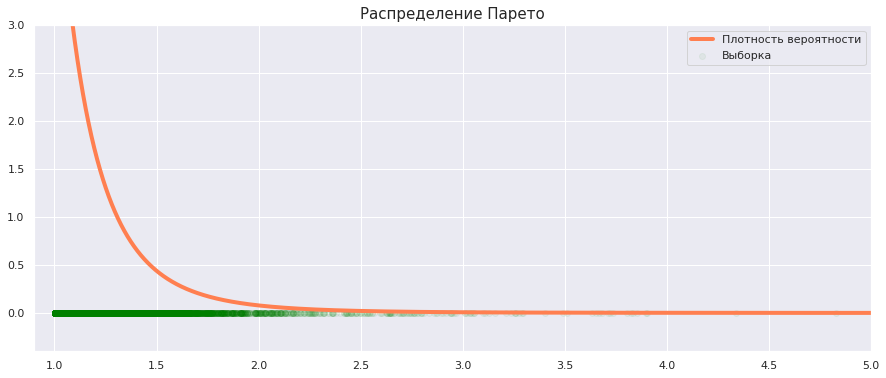

In [11]:
grid = np.linspace(1, gamma, N)
plt.figure(figsize=(15, 6))
plt.plot(grid, sps.pareto.pdf(grid, gamma), lw=4, color='coral', label='Плотность вероятности')
plt.scatter(sample, np.zeros(N), alpha=0.05, color='green', label='Выборка')
plt.ylim(-0.4, 3)
plt.xlim(0.9, 5)
plt.title('Распределение Парето', fontsize=15)
plt.legend()
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [12]:
s2 = np.cumsum(sample ** 2) / consecutive_numbers - (np.cumsum(sample) / consecutive_numbers) ** 2

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

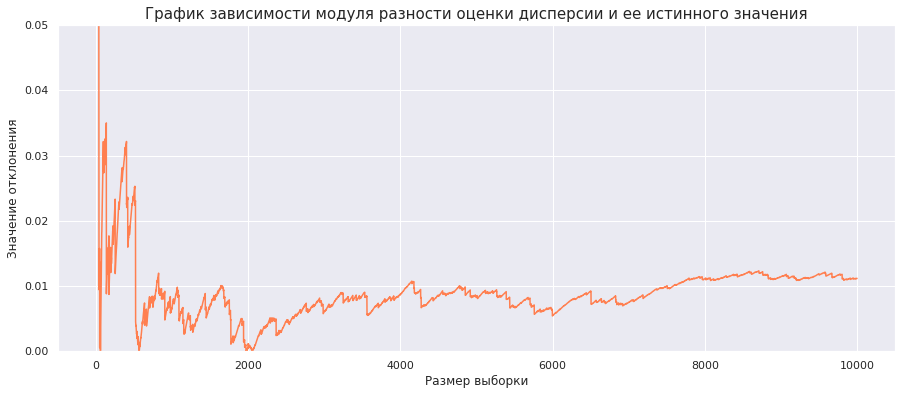

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(x, abs(s2 - sps.pareto.var(gamma)), color='coral')
plt.title('График зависимости модуля разности оценки дисперсии и ее истинного значения', fontsize=15)
plt.xlabel('Размер выборки')
plt.ylim(0, 0.05)
plt.ylabel('Значение отклонения')
plt.show()

__Вывод:__
В результате нескольких генераций было выявлено, что посчитанная оценка $s^2$ не является приемлимой: при значениях, близких к размеру выборки, разница между дисперсией и оценкой велика, при генерации некоторых выборок сходимость к нулю не наблюдается.

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


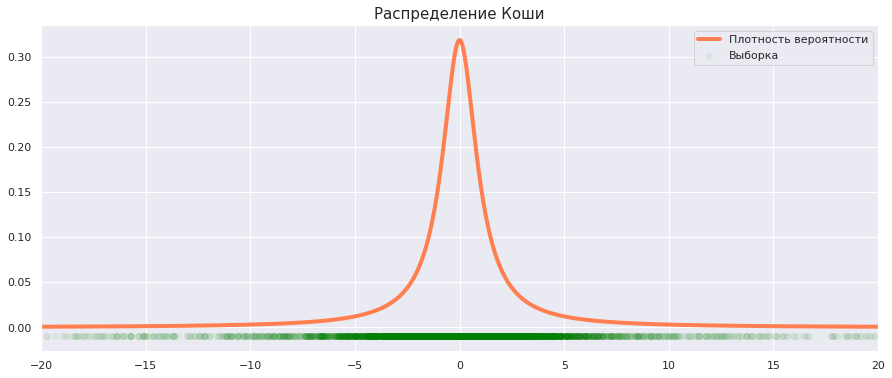

In [14]:
border = 20
# генерация выборки
sample = sps.cauchy.rvs(size=N)
# генерация сетки
grid = np.linspace(-border, border, N)
# построение графика
plt.figure(figsize=(15, 6))
plt.plot(grid, sps.cauchy.pdf(grid), lw=4, color='coral', label='Плотность вероятности')
plt.scatter(sample, np.zeros(N) - 0.01, alpha=0.05, color='green', label='Выборка')
plt.xlim(-border, border)
plt.legend()
plt.title('Распределение Коши', fontsize=15)
plt.show()

In [15]:
s2 = np.cumsum(sample ** 2) / consecutive_numbers - (np.cumsum(sample) / consecutive_numbers) ** 2

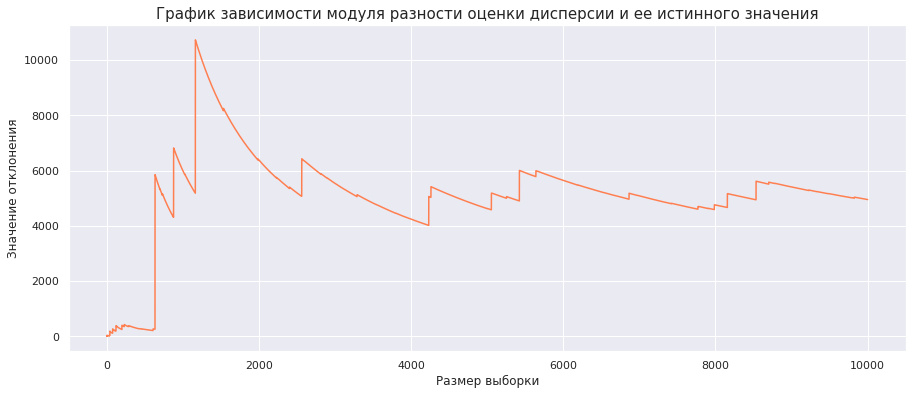

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(x, abs(s2), color='coral')
plt.title('График зависимости модуля разности оценки дисперсии и ее истинного значения', fontsize=15)
plt.xlabel('Размер выборки')
plt.ylabel('Значение отклонения')
plt.show()

__Вывод:__
Из теории известно, что у распределения Коши не существует математического ожидания и дисперсии. Отметим, что последний график не является информативным в том смысле, что мы наблюдаем резкий скачок, который говорит о том, что наша оценка скорее всего не будет сходится к какому-либо значению.

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [17]:
sample = sps.norm.rvs(size=N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различных значений $n$).

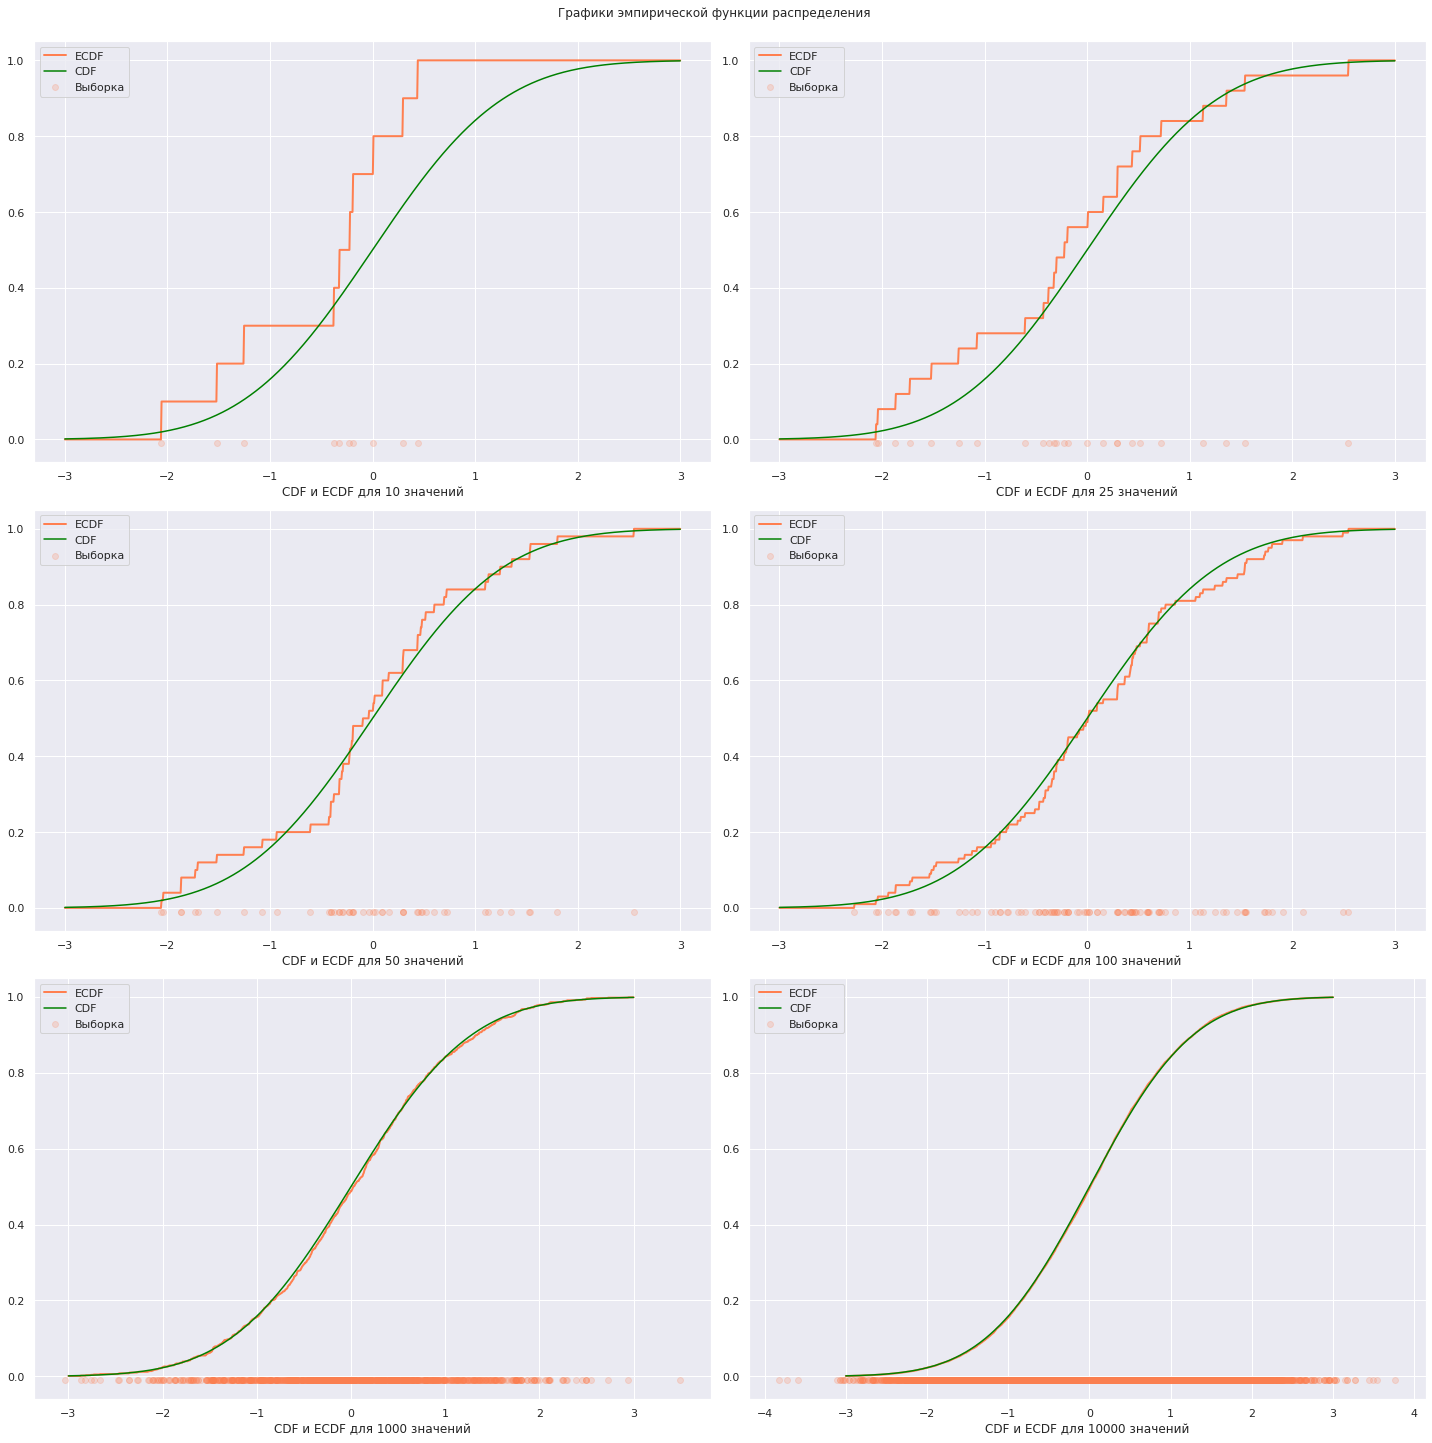

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize=(20, 20))

values_n = [10, 25, 50, 100, 1000, N]
grid = np.linspace(-3, 3, 1000)

for i in range(len(values_n)):
    plt.subplot(3, 2, i + 1)
    n = values_n[i]
    emp_cdf = ECDF(sample[:n])(grid)
    plt.plot(grid, emp_cdf, lw=2, color='coral', label='ECDF')
    plt.scatter(sample[:n], np.zeros(n) - 0.01, alpha=0.2, color='coral', label='Выборка')
    plt.plot(grid, sps.norm.cdf(grid), color='green', label='CDF')
    plt.xlabel('CDF и ECDF для {} значений'.format(values_n[i]))
    plt.legend()

plt.suptitle('Графики эмпирической функции распределения ', y=1)
plt.tight_layout()

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


Рассмотрим левый и правый пределы величин в точках скачков:

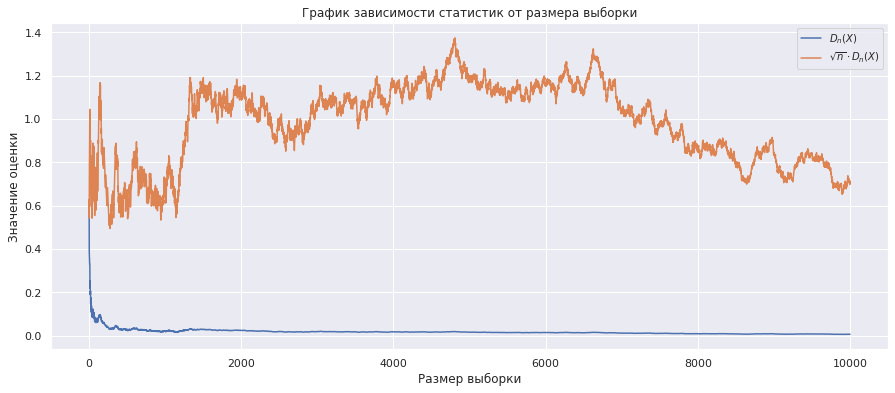

In [19]:
eps = 0.0001
plt.figure(figsize=(15, 6))

norm_cdf = sps.norm.cdf(sample)
x = np.linspace(1, N, N)
Dn = []
Dn_sqrt = []
for n in range(1, N + 1, 1):
    ecdf = ECDF(sample[:n])
    slice_norm_cdf = norm_cdf[:n]
    right = max(abs(ecdf(sample[:n] - eps) - slice_norm_cdf))
    left = max(abs(ecdf(sample[:n] + eps) - slice_norm_cdf))
    sup = max(left, right)
    Dn.append(sup)
    Dn_sqrt.append(n ** 0.5 * sup)

plt.plot(x, Dn, label='$D_n(X)$')
plt.plot(x, Dn_sqrt, label='$\sqrt{n} \cdot D_n(X)$')
plt.title('График зависимости статистик от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Значение оценки')
plt.legend(fontsize=10)
plt.show()

__Вывод:__
Построенный нами график иллюстрирует выполнение теоремы [Гливенко-Кантелли](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem), заметим, что при замене статистики на вторую из условия сходимость к нулю пропадает.

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

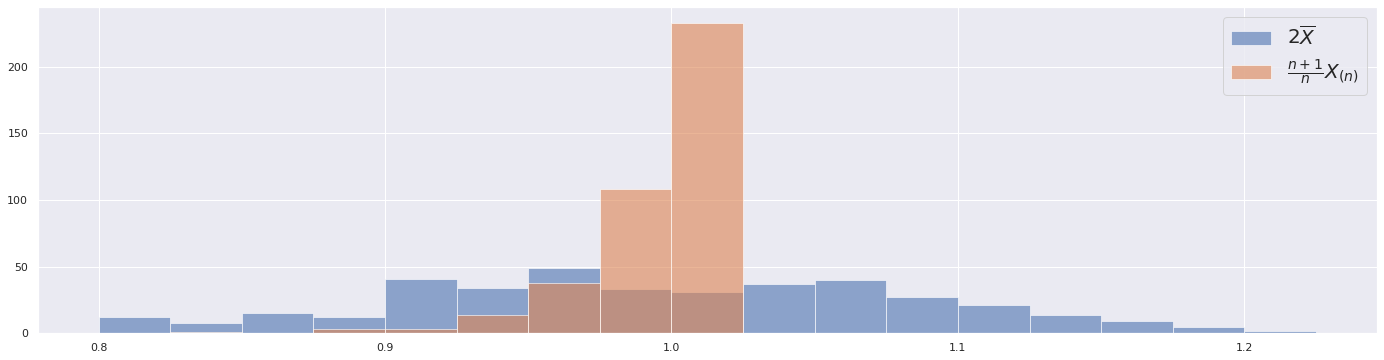

In [20]:
N_samples = 400
theta = 1
N = 40
# генерирую список последовательных чисел
consecutive_numbers = np.array(range(1, N + 1, 1))
# генерирую выборки
samples = sps.uniform(0, theta).rvs(size=(N_samples, N))
# считаю статистики
theta_est =  np.array([2 * samples[i].sum() / N for i in range(N_samples)]) # 2X
theta_star_est = np.array([max(samples[i]) * (1 + N) / N for i in range(N_samples)])

# cтрою графики
plt.figure(figsize=(24, 6))
bins_ = [i / 40 + 0.8 for i in range(18)]
# с помощью hstack сливаю все массивы оценок в один по оценке
plt.hist(theta_est, bins=bins_, alpha=0.6, label='$2\overline{X}$')
plt.hist(theta_star_est, bins=bins_, alpha=0.6, label='$\\frac{n+1}{n} X_{(n)}$')
plt.legend(fontsize=20)
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

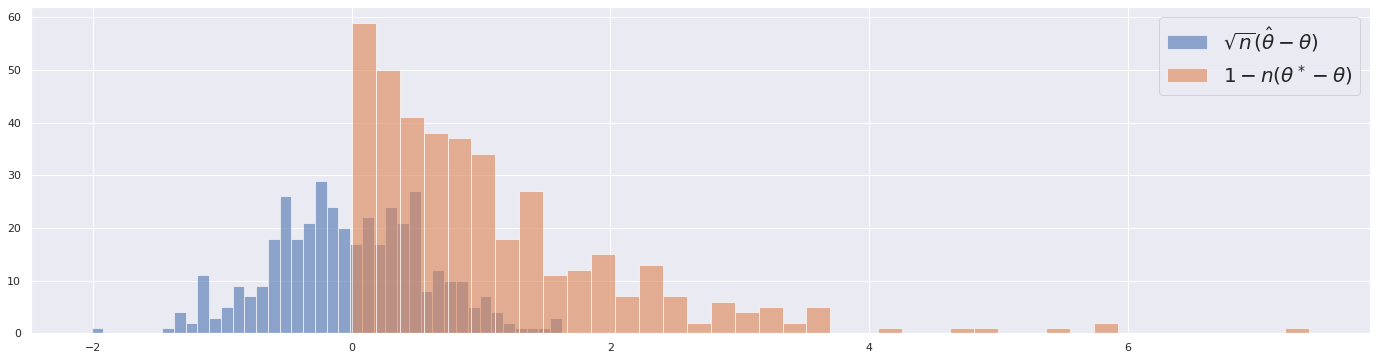

In [21]:
first_est = (theta_est - theta) * N ** 0.5
second_est = 1 - N * (theta_star_est - theta)

num_bins = 40
plt.figure(figsize=(24, 6))
plt.hist(first_est, bins=num_bins, alpha=0.6, label='$\sqrt{n} (\hat\\theta - \\theta)$')
plt.hist(second_est, bins=num_bins, alpha=0.6, label='$1 - n  (\\theta^* - \\theta)$')
plt.legend(fontsize=20)
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Одна из статистик имеет нормальное распределение по ЦПТ, иная -- одну из преобразованных форм экспоненциального (что доказывалось на лекциях).


Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: По ЦПТ: $\sigma(\theta) = 4 D(X_1) = \frac{4}{12} = \frac{1}{3}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

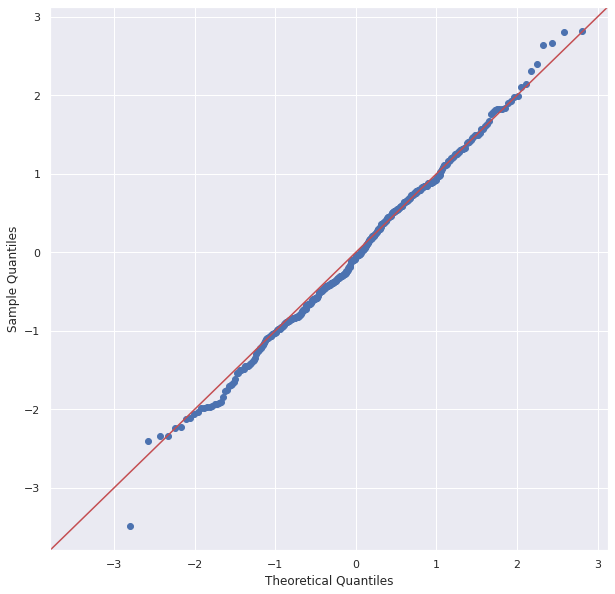

In [22]:
import statsmodels.api as sm

theta_norm = first_est * ( 3 ** 0.5)  # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
plt.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Да, поскольку визуально неплохое совпадение.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** Из всех опробованных мною распределений именно экспоненциальное подошло больше всего.

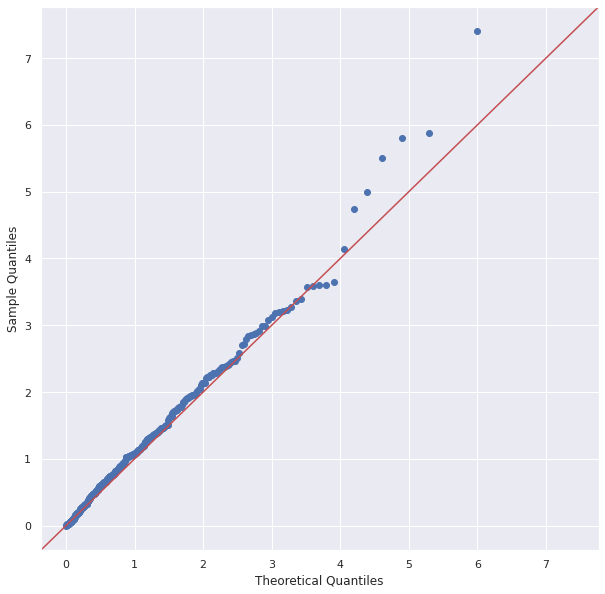

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(second_est, line='45', ax=ax, dist=sps.expon)
plt.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** На самом деле, не очень: оценка, которая не является асимптотически нормальной, сходится быстрее.

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.